## Preparation

Imported necessary packages

In [122]:
using ForwardDiff
using NBInclude
@nbinclude("Visualization.ipynb");

Defined Rosenbrock function

In [84]:
rosenbrock(x) = sum([100*(x[i+1]-x[i]^2)^2 + (1-x[i])^2 for i in 1:(length(x)-1)])

rosenbrock (generic function with 1 method)

Defined util functions for logging the results of optimizations

In [112]:
function log(x, y, last::Bool=false)
    n = length(y)
    for i in (last ? n : 1):n
        println("function value in iteration $i for x=$(x[:, i]) is $(y[i])")
    end
end

log (generic function with 4 methods)

In [113]:
log(xy::Tuple, last::Bool=false) = log(xy[1], xy[2], last)

log (generic function with 4 methods)

## Gradient Descent

In [114]:
rosenbrock_gradient(x) = ForwardDiff.gradient(rosenbrock, x)

rosenbrock_gradient (generic function with 1 method)

In [115]:
function rosenbrock_gradient_descent(x, learningRate, iteration)
    dimensions = length(x)
    arguments = zeros(dimensions, iteration)
    values = zeros(iteration)
    
    for i in 1:iteration
        gradient = rosenbrock_gradient(x)
        x -= (learningRate * gradient)
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
    end
    return (arguments, values)
end

rosenbrock_gradient_descent (generic function with 1 method)

In [116]:
log(rosenbrock_gradient_descent(zeros(2), 1, 5))

function value in iteration 1 for x=[2.0, 0.0] is 1601.0
function value in iteration 2 for x=[-3200.0, 800.0] is 1.04841216742464e16
function value in iteration 3 for x=[1.3106176003202e13, 2.0478408e9] is 2.950556825554033e54
function value in iteration 4 for x=[-9.005088363938272e41, 3.4354369885381586e28] is 6.575850257231013e169
function value in iteration 5 for x=[2.920948686551318e128, 1.6218323288467292e86] is Inf


In [117]:
iterations=6000
iteration_range = 1:iterations

1:6000

In [118]:
arg, val = rosenbrock_gradient_descent(zeros(2), 0.001953125, iterations)
log(arg, val, true)

function value in iteration 6000 for x=[0.9971980089981242, 0.9943926377931679] is 7.863767911824422e-6


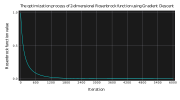

In [123]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [120]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

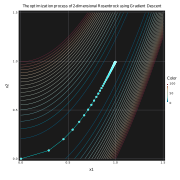

In [125]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 100,
    "The optimization process of 2-dimensional Rosenbrock using Gradient Descent",
    "x1", "x2",
)

## Newton

In [127]:
rosenbrock_hessian(x) = ForwardDiff.hessian(rosenbrock, x)

rosenbrock_hessian (generic function with 1 method)

In [128]:
function rosenbrock_newton(x, iteration)
    dimensions = length(x)
    arguments = zeros(dimensions, iteration)
    values = zeros(iteration)
    
    for i in 1:iteration
        hessian = rosenbrock_hessian(x)
        hessian_inverted = inv(hessian)
        gradient = rosenbrock_gradient(x)
        x -= hessian_inverted * gradient
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
    end
    return (arguments, values)
end
    

rosenbrock_newton (generic function with 1 method)

In [161]:
arg, val = rosenbrock_newton(rand(2), 10)
log(arg, val)

function value in iteration 1 for x=[0.47791290573339906, 0.21860367659950874] is 0.28217318983827944
function value in iteration 2 for x=[0.6543286198718311, 0.39702343858840233] is 0.21634972977632375
function value in iteration 3 for x=[0.7021757151704285, 0.4907613904465897] is 0.08922341447126898
function value in iteration 4 for x=[0.9064631402362909, 0.7799420725669972] is 0.1829164113842508
function value in iteration 5 for x=[0.9164706461908786, 0.8398182951540956] is 0.00697815595353327
function value in iteration 6 for x=[0.9983597582130193, 0.9900163801513836] is 0.00449950152294351
function value in iteration 7 for x=[0.9990603673342427, 0.9981211267248912] is 8.829336402386713e-7
function value in iteration 8 for x=[0.9999999077647257, 0.9999989327932394] is 7.793083085544796e-11
function value in iteration 9 for x=[0.999999999983719, 0.9999999999674295] is 2.650775060292651e-22
function value in iteration 10 for x=[1.0, 1.0] is 0.0


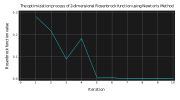

In [168]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")

In [190]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

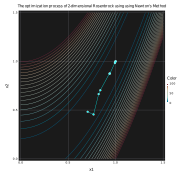

In [191]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 1,
    "The optimization process of 2-dimensional Rosenbrock using using Newton's Method",
    "x1", "x2",
)

## 4-dimension functions

In [172]:
log(rosenbrock_gradient_descent(zeros(4), 1, 5))

function value in iteration 1 for x=[2.0, 2.0, 0.0, 0.0] is 2403.0
function value in iteration 2 for x=[-1600.0, -1200.0, 0.0, 0.0] is 7.009447403851203e15
function value in iteration 3 for x=[1.639168001602e12, 6.93056241202e11, 0.0, 0.0] is 5.950592759290638e53
function value in iteration 4 for x=[-1.7616936705912477e39, -1.3315743716473421e38, 0.0, 0.0] is 5.373886071432001e167
function value in iteration 5 for x=[2.187012037085861e120, 9.444006446884544e116, 0.0, 0.0] is Inf


In [175]:
arg, val = rosenbrock_gradient_descent(zeros(4), 0.001, 6000)
log(arg, val, true)

function value in iteration 6000 for x=[0.9951578422680162, 0.9903210373610224, 0.0, 0.0] is 0.000491168476188688


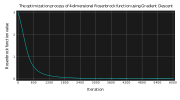

In [176]:
visualize_training_process(length(val), val, 
    "The optimization process of 4-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [184]:
arg, val = rosenbrock_newton(rand(4), 10)
log(arg, val)

function value in iteration 1 for x=[0.7677690292724831, 0.4543091596540669, 0.0, 0.0] is 8.498741325272862
function value in iteration 2 for x=[0.7059382461819208, 0.48172586403221396, 0.0, 0.0] is 1.0325432651811495
function value in iteration 3 for x=[0.8219089386399647, 0.6635545207329592, 0.0, 0.0] is 0.7380125404190325
function value in iteration 4 for x=[0.8389563087061339, 0.7028258570217383, 0.0, 0.0] is 0.3777838630440434
function value in iteration 5 for x=[0.9407112159738766, 0.8743541175529268, 0.0, 0.0] is 0.5406248692532776
function value in iteration 6 for x=[0.935097642765512, 0.8739679694794812, 0.0, 0.0] is 0.07651133502640561
function value in iteration 7 for x=[0.9956197290937701, 0.9876007547561017, 0.0, 0.0] is 0.1783179395760117
function value in iteration 8 for x=[0.9920731092139776, 0.9841436364635183, 0.0, 0.0] is 0.0013176541543353038
function value in iteration 9 for x=[0.9999805559719918, 0.9998990080299925, 0.0, 0.0] is 0.00010112808875171581
function val

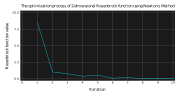

In [185]:
visualize_training_process(length(val), val, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")